In [ ]:
 !pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.164.0
    Uninstalling google-api-python-client-2.164.0:
      Successfully uninstalled google-api-python-client-2.164.0


In [ ]:
from google.colab import drive
import gdown
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install oauth2client

In [ ]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
from oauth2client.client import GoogleCredentials

credentials = GoogleCredentials.get_application_default()
service = build('drive', 'v3', credentials=credentials)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import io
from google.colab import drive
from google.oauth2 import service_account


# Function to download the file from Google Drive by its ID
def download_file_from_drive(file_id):
    print(f"Downloading file with ID: {file_id}")
    fh = io.BytesIO()
    request = service.files().get_media(fileId=file_id)
    downloader = MediaIoBaseDownload(fh, request)

    done = False
    while not done:
        status, done = downloader.next_chunk()
        print(f"Download progress: {int(status.progress() * 100)}%")

    fh.seek(0)
    df = pd.read_csv(fh)
    print("Loaded data with shape:", df.shape)
    return df

# Dictionary of file IDs
file_ids = {
    'attacks': "1ff5VaZkghWnVu6YuNrmIuaybZbsSDEyX"
    }

# Load each file into a DataFrame stored in a dictionary
dataframes = {}
for key, file_id in file_ids.items():
    try:
        df = download_file_from_drive(file_id)
        dataframes[key] = df
    except Exception as e:
        print(f"Failed to download or load {key}: {e}")

# Example access: dataframes['attacks'].head()


Download progress: 1%
Download progress: 2%
Download progress: 4%
Download progress: 5%
Download progress: 7%
Download progress: 8%
Download progress: 10%
Download progress: 11%
Download progress: 13%
Download progress: 14%
Download progress: 16%
Download progress: 17%
Download progress: 19%
Download progress: 20%
Download progress: 22%
Download progress: 23%
Download progress: 25%
Download progress: 26%
Download progress: 28%
Download progress: 29%
Download progress: 31%
Download progress: 32%
Download progress: 34%
Download progress: 35%
Download progress: 37%
Download progress: 38%
Download progress: 40%
Download progress: 41%
Download progress: 43%
Download progress: 44%
Download progress: 46%
Download progress: 47%
Download progress: 49%
Download progress: 50%
Download progress: 52%
Download progress: 53%
Download progress: 55%
Download progress: 56%
Download progress: 58%
Download progress: 59%
Download progress: 61%
Download progress: 62%
Download progress: 64%
Download progress

<ipython-input-5-22e8a1a90b49>:24: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fh)


Loaded data with shape: (26380592, 34)


In [ ]:
attacks = dataframes['attacks'].copy()

In [ ]:
# 1. Summary of data types
print("🔍 Column Data Types Summary:\n")
print(df.dtypes.value_counts())

# 2. List of numeric and categorical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n✅ Numeric Features ({len(numeric_cols)}):\n{numeric_cols}")
print(f"\n✅ Categorical Features ({len(categorical_cols)}):\n{categorical_cols}")


🔍 Column Data Types Summary:

float64    25
object      1
Name: count, dtype: int64

✅ Numeric Features (25):
['frame.len', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 'radiotap.datarate', 'radiotap.length', 'radiotap.mactime', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan_radio.duration', 'wlan.seq', 'wlan_radio.data_rate', 'wlan_radio.end_tsf', 'wlan_radio.signal_dbm', 'wlan_radio.start_tsf', 'wlan_radio.timestamp']

✅ Categorical Features (1):
['Label']


,count
frame.time_delta,
0.000003,2387370
0.000002,2088763
0.000004,1628677
0.000001,1160088
0.000005,562662
...,...
0.048344,1
0.041103,1
0.024209,1


In [ ]:
# Show unique values (or top few) from each categorical feature
print("\n🔍 Unique values in categorical features:")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals[:5]}{'...' if len(unique_vals) > 5 else ''}")



🔍 Unique values in categorical features:
Label: ['Normal' '(Re)Assoc']


In [ ]:
print(f"columns for all attacks dataset: {dataframes['attacks'].columns} with length: {dataframes['attacks'].shape}  ")
print(f"columns for sql_injection dataset: {dataframes['sql_injection'].columns} with: {dataframes['sql_injection'].shape} ")
print(f"columns for (Re)Assoc dataset: {dataframes['(Re)Assoc'].columns} with {dataframes['(Re)Assoc'].shape}" )

columns for all attacks dataset: Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.rxflags', 'radiotap.timestamp.ts', 'wlan.duration',
       'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata',
       'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry',
       'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration',
       'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency',
       'wlan_radio.signal_dbm', 'wlan_radio.phy', 'Label'],
      dtype='object') with length: (26380592, 34)  
columns for sql_injection dataset: Index(['frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', '

In [ ]:
dataframes['attacks']['Label'].value_counts()

,count
Label,
Normal,25316835
Website_spoofing,405121
Kr00k,191803
Malware,131611
Evil_Twin,104827
Disas,75131
Botnet,56891
Krack,49990
Deauth,38942


In [ ]:
sql = dataframes['sql_injection'].copy()
# Drop all columns that contain any null values
sql = sql.dropna(axis=1, how='any')
sql = sql.drop('frame.number', axis = 1)
# Check final result
print("✅ Columns with nulls dropped.")
print("Remaining columns:", sql.columns.tolist())
print("Final shape:", sql.shape)



✅ Columns with nulls dropped.
Remaining columns: ['frame.len', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 'radiotap.length', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan_radio.duration', 'wlan.seq', 'wlan_radio.data_rate', 'wlan_radio.signal_dbm', 'wlan_radio.phy', 'Label']
Final shape: (1100487, 22)


In [ ]:
rc = dataframes['(Re)Assoc'].copy()
# Check final result
print("✅ Columns with nulls dropped.")
print("Remaining columns:", rc.columns.tolist())
print("Final shape:", rc.shape)


✅ Columns with nulls dropped.
Remaining columns: ['frame.len', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 'radiotap.datarate', 'radiotap.length', 'radiotap.mactime', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan_radio.duration', 'wlan.seq', 'wlan_radio.data_rate', 'wlan_radio.end_tsf', 'wlan_radio.signal_dbm', 'wlan_radio.start_tsf', 'wlan_radio.timestamp', 'Label']
Final shape: (39894, 26)


In [ ]:
# prompt: print columns that are in rc but not in sq_injection

# Find columns present in 'rc' but not in 'sql'
rc_columns = set(rc.columns)
sql_columns = set(sql.columns)

columns_in_rc_not_sql = rc_columns - sql_columns

print("Columns in 'rc' but not in 'sql':", columns_in_rc_not_sql)


Columns in 'rc' but not in 'sql': {'wlan_radio.end_tsf', 'wlan_radio.timestamp', 'radiotap.mactime', 'wlan_radio.start_tsf', 'radiotap.datarate'}


In [ ]:
# prompt: print columns that are in sql but not in rc

# Find columns present in 'sql' but not in 'rc'
sql_columns = set(sql.columns)
rc_columns = set(rc.columns)

columns_in_sql_not_rc = sql_columns - rc_columns

print("Columns in 'sql' but not in 'rc':", columns_in_sql_not_rc)


Columns in 'sql' but not in 'rc': {'wlan_radio.phy'}


In [ ]:
# prompt: verify that sql has 22, rc has 26, print the length of the intersection

# Calculate the intersection of columns
intersection = sql_columns.intersection(rc_columns)

# Print the length of the intersection
print("Length of the intersection:", len(intersection))


Length of the intersection: 21


In [ ]:
# prompt: create rc and sql only from the intersection features

# Create new DataFrames containing only the intersection features
rc_intersection = rc[list(intersection)]
sql_intersection = sql[list(intersection)]

print("Shape of rc_intersection:", rc_intersection.shape)
print("Shape of sql_intersection:", sql_intersection.shape)


Shape of rc_intersection: (39894, 21)
Shape of sql_intersection: (1100487, 21)


✅ Classification Report:

               precision    recall  f1-score   support

       Normal       1.00      1.00      1.00    219572
SQL_Injection       0.98      0.89      0.93       526

     accuracy                           1.00    220098
    macro avg       0.99      0.94      0.97    220098
 weighted avg       1.00      1.00      1.00    220098



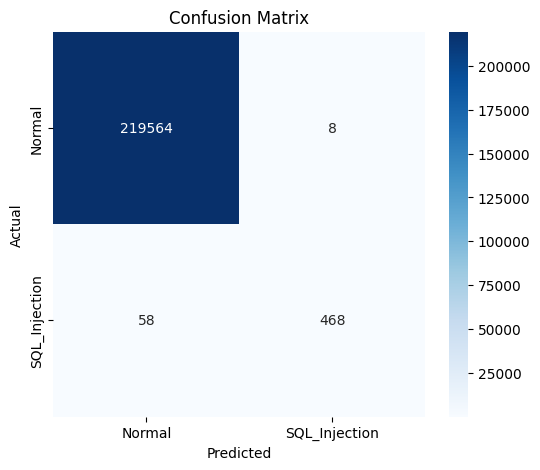

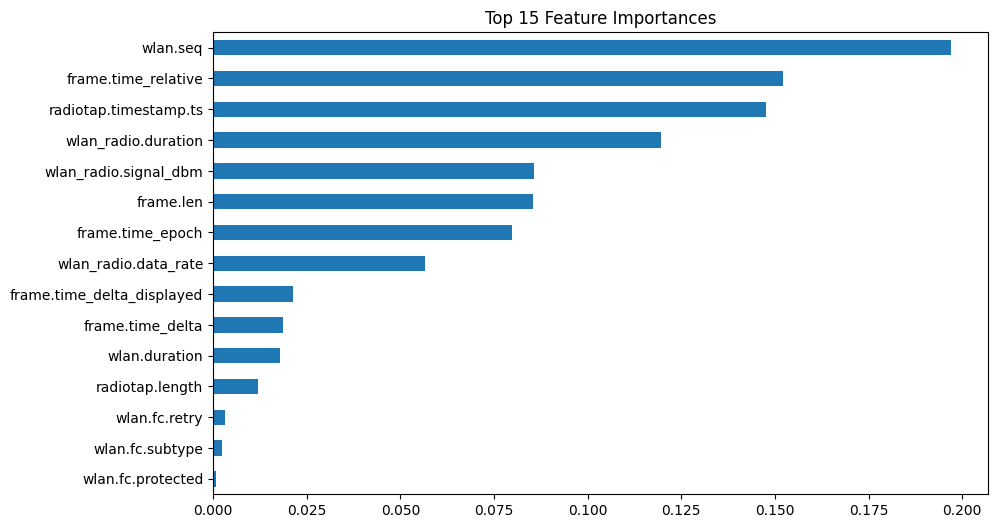

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Separate features and label
X = sql_intersection.drop(columns=['Label'])
y = sql_intersection['Label']

# 2. Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Helps with imbalanced datasets
    random_state=42
)
rf.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = rf.predict(X_test)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


✅ Classification Report:

               precision    recall  f1-score   support

       Normal       1.00      1.00      1.00    219572
SQL_Injection       0.91      0.94      0.92       526

     accuracy                           1.00    220098
    macro avg       0.95      0.97      0.96    220098
 weighted avg       1.00      1.00      1.00    220098



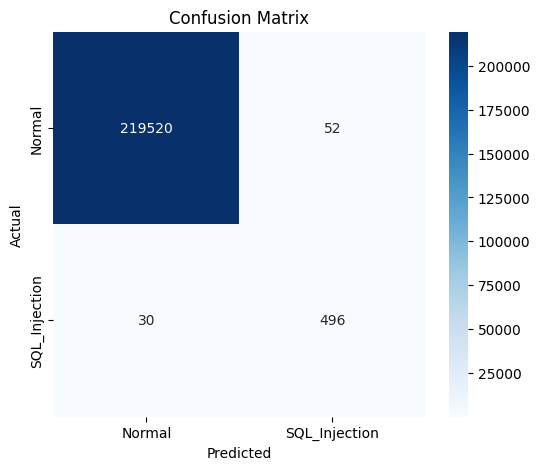

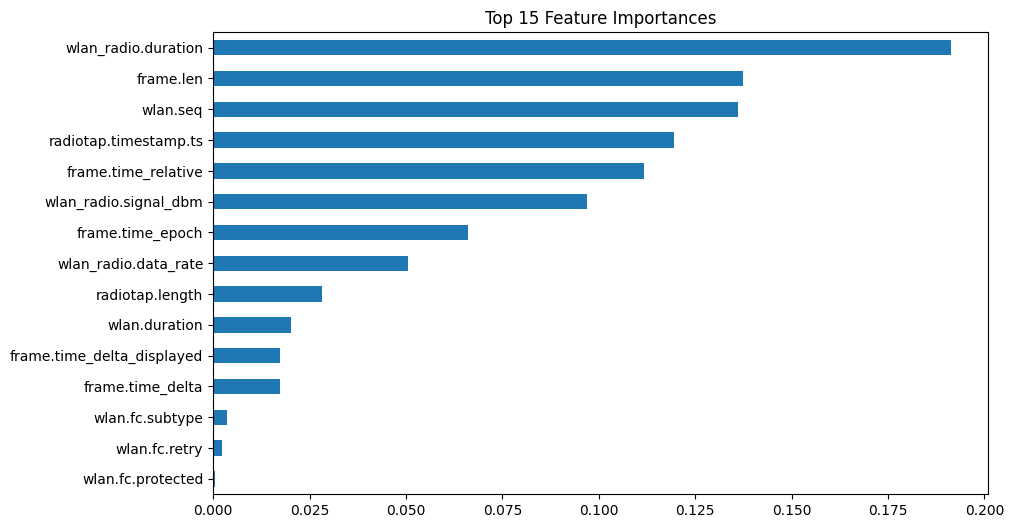

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # <- NEW
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Separate features and label
X = sql_intersection.drop(columns=['Label'])
y = sql_intersection['Label']

# 2. Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Optional with SMOTE, can also use None
    random_state=42
)
rf.fit(X_train_resampled, y_train_resampled)

# 5. Evaluate the model
y_pred = rf.predict(X_test)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# 6. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# === Step 1: Prepare Data ===
X = dataframes['attacks'].drop(columns=['Label'])   # Assuming your label column is named 'Label'
y = dataframes['attacks']['Label']

# === Step 2: Stratified Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Train Random Forest ===
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Very important for multi-class imbalance
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# === Step 4: Evaluation ===
y_pred = rf_model.predict(X_test)

print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

# === Step 5: Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix (Multi-Class IDS)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# === Step 6: Feature Importance ===
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

# === Step 7: Save Model to Drive (Optional) ===
from google.colab import drive
drive.mount('/content/drive')

joblib.dump(rf_model, '/content/drive/MyDrive/multiclass_ids_model.joblib')
print("✅ Model saved to: /content/drive/MyDrive/multiclass_ids_model.joblib")


In [ ]:
# List of selected features to keep (including the target column 'Label')
selected_features = [
    'frame.len', 'frame.time_delta', 'frame.time_delta_displayed',
    'frame.time_epoch', 'frame.time_relative',
    'radiotap.length', 'radiotap.timestamp.ts',
    'wlan.duration', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata',
    'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry',
    'wlan.fc.subtype', 'wlan_radio.duration',
    'wlan_radio.data_rate', 'wlan_radio.signal_dbm',
     'Label'
]

# Filter the dataframe to keep only these columns
attacks = dataframes['attacks'][selected_features]

print("✅ Filtered dataset shape:", df.shape)
print("✅ Remaining columns:", df.columns.tolist())


✅ Filtered dataset shape: (39894, 26)
✅ Remaining columns: ['frame.len', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 'radiotap.datarate', 'radiotap.length', 'radiotap.mactime', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan_radio.duration', 'wlan.seq', 'wlan_radio.data_rate', 'wlan_radio.end_tsf', 'wlan_radio.signal_dbm', 'wlan_radio.start_tsf', 'wlan_radio.timestamp', 'Label']


✅ Classification Report (Test Set):
                  precision    recall  f1-score   support

       (Re)Assoc       1.00      1.00      1.00      1100
          Botnet       0.92      0.85      0.88     11378
          Deauth       1.00      1.00      1.00      7788
           Disas       1.00      1.00      1.00     15026
       Evil_Twin       1.00      1.00      1.00     20966
           Kr00k       1.00      1.00      1.00     38361
           Krack       1.00      1.00      1.00      9998
         Malware       0.99      0.99      0.99     26322
          Normal       1.00      1.00      1.00   5063368
         RogueAP       1.00      1.00      1.00       262
   SQL_Injection       0.95      0.70      0.80       526
Website_spoofing       0.99      0.99      0.99     81024

        accuracy                           1.00   5276119
       macro avg       0.99      0.96      0.97   5276119
    weighted avg       1.00      1.00      1.00   5276119



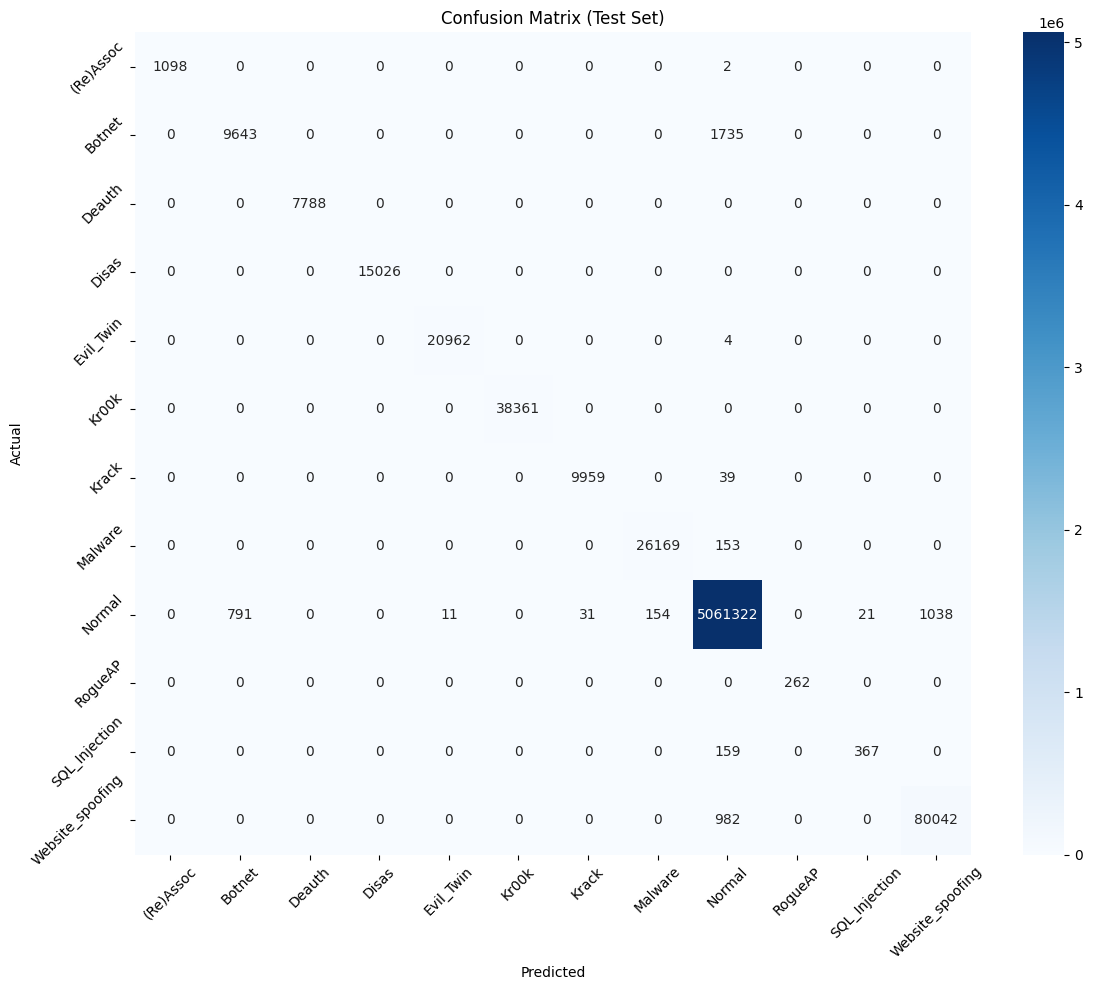

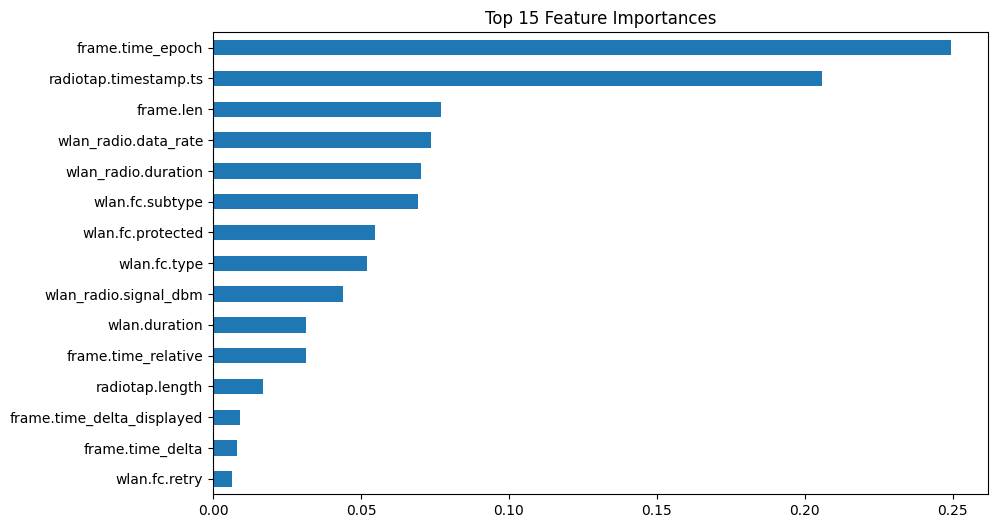

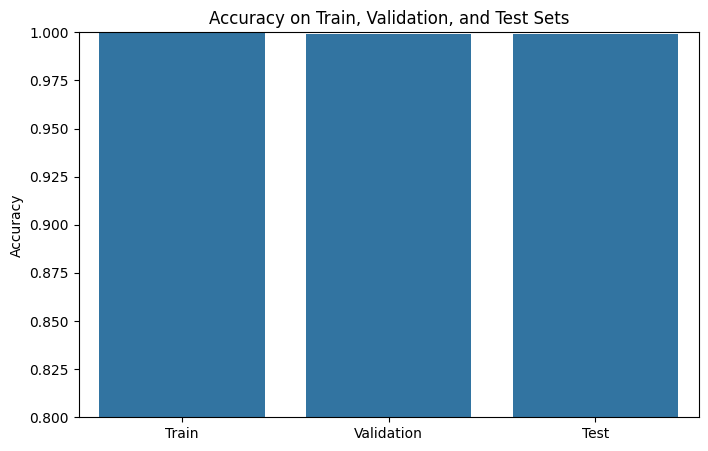

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import numpy as np


# === Step 2: Prepare Data ===
X = attacks.drop(columns=['Label'])
y = attacks['Label']

# === Step 3: Stratified Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 4: Add Validation Split from Train Set ===
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# === Step 5: Train Random Forest on Training Subset ===
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_sub, y_train_sub)

# === Step 6: Predict and Evaluate on All Sets ===
y_pred_train = rf_model.predict(X_train_sub)
y_pred_val = rf_model.predict(X_val)
y_pred_test = rf_model.predict(X_test)

acc_train = accuracy_score(y_train_sub, y_pred_train)
acc_val = accuracy_score(y_val, y_pred_val)
acc_test = accuracy_score(y_test, y_pred_test)

print("✅ Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# === Step 7: Confusion Matrix for Test Set ===
conf_matrix = confusion_matrix(y_test, y_pred_test, labels=rf_model.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# === Step 8: Feature Importance ===
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

# === Step 9: Plot Train/Validation/Test Accuracy ===
plt.figure(figsize=(8, 5))
sets = ['Train', 'Validation', 'Test']
accuracies = [acc_train, acc_val, acc_test]
sns.barplot(x=sets, y=accuracies)
plt.ylim(0.8, 1.0)
plt.title("Accuracy on Train, Validation, and Test Sets")
plt.ylabel("Accuracy")
plt.show()



In [ ]:
# === Step 10: Save Model Locally ===


output_path = '/content/drive/MyDrive/attacks_model/attacks_model_rf.joblib'
joblib.dump(rf_model, output_path)

print(f"✅ Model saved to: {output_path}")

✅ Model saved to: /content/drive/MyDrive/attacks_model/attacks_model_rf.joblib


In [ ]:
top_11_features = [
    "frame.time_epoch",
    "radiotap.timestamp.ts",
    "frame.len",
    "wlan_radio.data_rate",
    "wlan_radio.duration",
    "frame.time_relative",
    "wlan_radio.signal_dbm",
    "frame.time_delta_displayed",
    "frame.time_delta",
    "wlan.duration"
]


In [ ]:
import pandas as pd
from sklearn.utils import resample

# assume `attacks` is your full DataFrame with a 'Label' column

# (a) Split majority and minority classes
df_normal = attacks[attacks['Label'] == 'Normal']
df_other  = attacks[attacks['Label'] != 'Normal']

# (b) Find size of the largest minority class
counts_other = df_other['Label'].value_counts()
max_minority = counts_other.max()

# (c) Set “Normal” sample size to 3× that
n_samples = max_minority * 3

# (d) Downsample “Normal” accordingly
df_normal_down = resample(
    df_normal,
    replace=False,       # without replacement
    n_samples=n_samples, # 3× largest minority class
    random_state=42
)

# (e) Recombine and shuffle
attacks_downsampled = pd.concat([df_normal_down, df_other]) \
                      .sample(frac=1, random_state=42) \
                      .reset_index(drop=True)

# check new class counts
print(attacks_downsampled['Label'].value_counts())


Label
Normal              1215363
Website_spoofing     405121
Kr00k                191803
Malware              131611
Evil_Twin            104827
Disas                 75131
Botnet                56891
Krack                 49990
Deauth                38942
(Re)Assoc              5502
SQL_Injection          2629
RogueAP                1310
Name: count, dtype: int64


Train accuracy: 1.0000
Validation accuracy: 0.9977
Test accuracy: 0.9975

Classification Report (Test Set):
                  precision    recall  f1-score   support

       (Re)Assoc       1.00      1.00      1.00      1100
          Botnet       0.97      0.98      0.97     11378
          Deauth       1.00      1.00      1.00      7788
           Disas       1.00      1.00      1.00     15026
       Evil_Twin       1.00      1.00      1.00     20966
           Kr00k       1.00      1.00      1.00     38361
           Krack       1.00      1.00      1.00      9998
         Malware       1.00      1.00      1.00     26322
          Normal       1.00      1.00      1.00    243073
         RogueAP       1.00      1.00      1.00       262
   SQL_Injection       0.92      0.84      0.88       526
Website_spoofing       1.00      1.00      1.00     81024

        accuracy                           1.00    455824
       macro avg       0.99      0.98      0.99    455824
    weighted avg    

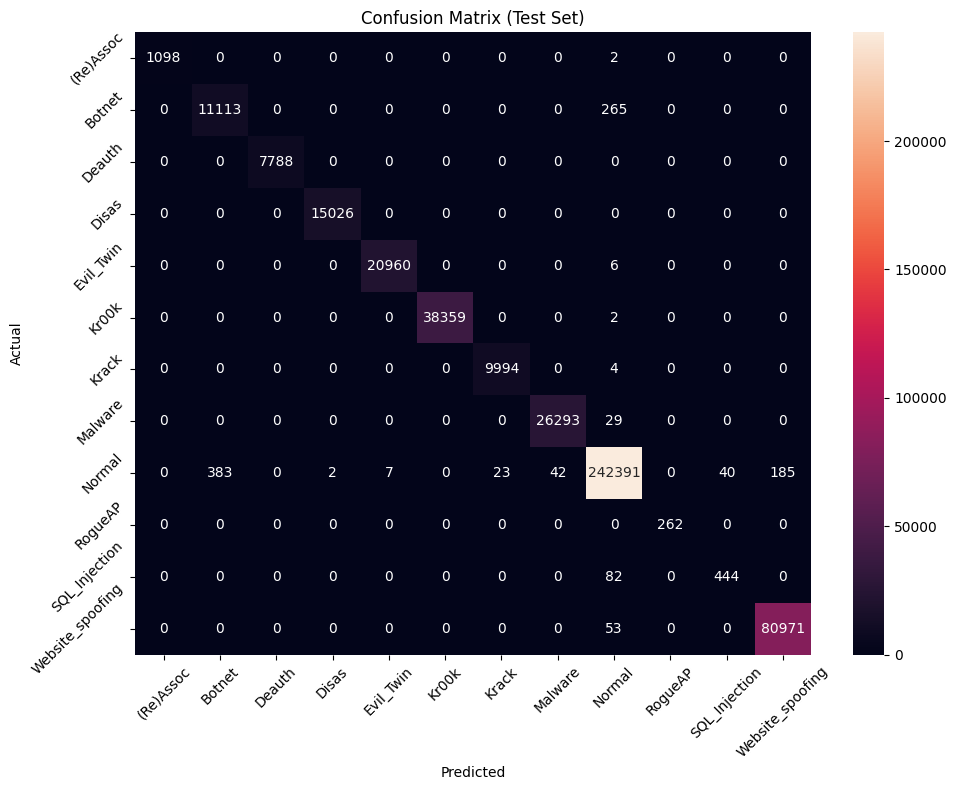

['rf_downsampled_model.pkl']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# (a) Define your feature subset
feature_cols = [
    'frame.time_epoch',
    'radiotap.timestamp.ts',
    'frame.len',
    'wlan_radio.data_rate',
    'wlan_radio.duration',
    'frame.time_relative',
    'wlan_radio.signal_dbm',
    'frame.time_delta_displayed',
    'frame.time_delta',
    'wlan.duration'
]

# (b) Prepare X and y
X = attacks_downsampled[feature_cols]
y = attacks_downsampled['Label']





# (e) Train the model
rf_all = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_all.fit(X, y)

# (f) Evaluate
for name, (X_, y_) in [
    ('Train',      (X_train_sub, y_train_sub)),
    ('Validation', (X_val,       y_val)),
    ('Test',       (X_test,      y_test))
]:
    y_pred = rf.predict(X_)
    acc    = accuracy_score(y_, y_pred)
    print(f"{name} accuracy: {acc:.4f}")
    if name == 'Test':
        print("\nClassification Report (Test Set):")
        print(classification_report(y_, y_pred))

# (g) Plot Test confusion matrix
cm = confusion_matrix(y_test, rf.predict(X_test), labels=rf.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
# === Step 10: Save Model Locally ===


output_path = '/content/drive/MyDrive/attacks_model/rf_attacks.joblib'
joblib.dump(rf, output_path)

print(f"✅ Model saved to: {output_path}")

✅ Model saved to: /content/drive/MyDrive/attacks_model/rf_attacks.joblib


In [ ]:
# suppose `attacks` is your full DataFrame
cols = ['radiotap.timestamp.ts', 'wlan_radio.duration', 'wlan_radio.signal_dbm']

# Compute the median of each
defaults = attacks_downsampled[feature_cols].median()
print(defaults)
# radiotap.timestamp.ts    1.234567e+09
# wlan_radio.duration      0.000123
# wlan_radio.signal_dbm   -45.000000
# dtype: float64


frame.time_epoch              1.608066e+09
radiotap.timestamp.ts         2.906511e+09
frame.len                     1.580000e+02
wlan_radio.data_rate          5.200000e+01
wlan_radio.duration           4.500000e+01
frame.time_relative           4.896642e+02
wlan_radio.signal_dbm        -3.900000e+01
frame.time_delta_displayed    5.400000e-05
frame.time_delta              5.400000e-05
wlan.duration                 4.800000e+01
dtype: float64


In [ ]:
attacks_downsampled[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279120 entries, 0 to 2279119
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   frame.time_epoch            float64
 1   radiotap.timestamp.ts       float64
 2   frame.len                   float64
 3   wlan_radio.data_rate        float64
 4   wlan_radio.duration         float64
 5   frame.time_relative         float64
 6   wlan_radio.signal_dbm       float64
 7   frame.time_delta_displayed  float64
 8   frame.time_delta            float64
 9   wlan.duration               float64
dtypes: float64(10)
memory usage: 173.9 MB


In [ ]:
import pandas as pd

# (a) Define your feature subset
feature_cols = [
    'frame.time_epoch',
    'radiotap.timestamp.ts',
    'frame.len',
    'wlan_radio.data_rate',
    'wlan_radio.duration',
    'frame.time_relative',
    'wlan_radio.signal_dbm',
    'frame.time_delta_displayed',
    'frame.time_delta',
    'wlan.duration'
]

# 2) Hard‑coded medians (as floats)
DEFAULTS = {
    'frame.time_epoch':            1.608066e+09,
    'radiotap.timestamp.ts':       2.906511e+09,
    'frame.len':                   1.580000e+02,
    'wlan_radio.data_rate':        5.200000e+01,
    'wlan_radio.duration':         4.500000e+01,
    'frame.time_relative':         4.896642e+02,
    'wlan_radio.signal_dbm':      -3.900000e+01,
    'frame.time_delta_displayed':  5.400000e-05,
    'frame.time_delta':            5.400000e-05,
    'wlan.duration':               4.800000e+01
}

def preprocess_capture(df: pd.DataFrame) -> pd.DataFrame:
    """
    1. Subset to FEATURE_COLS
    2. Coerce all to numeric (invalid → NaN)
    3. Fill any NaNs with the hard‑coded DEFAULTS
    4. Ensure float64 dtype
    """
    # a) Work on a copy
    df = df.copy()

    # b) Subset (this also drops any extra columns)
    df = df.reindex(columns=feature_cols)

    # c) Coerce everything to numeric, invalid entries become NaN
    df = df.apply(pd.to_numeric, errors='coerce')

    # d) Fill NaNs with your defaults
    df = df.fillna(DEFAULTS)

    # e) Enforce float64 dtype (optional since default is float64)
    df = df.astype('float64')

    return df

# Example usage:
# raw = pd.read_csv('captured_packets.csv')
# X_ready = preprocess_capture(raw)
# y_pred = rf_model.predict(X_ready)


In [ ]:
attacks['Label'].unique()

array(['Normal', 'Deauth', 'Disas', '(Re)Assoc', 'RogueAP', 'Krack',
       'Kr00k', 'Botnet', 'Malware', 'SQL_Injection', 'Evil_Twin',
       'Website_spoofing'], dtype=object)

In [ ]:
import pandas as pd

# List of the 12 attack types to sample from
attack_types = [
    'Normal', 'Deauth', 'Disas', '(Re)Assoc', 'RogueAP', 'Krack',
    'Kr00k', 'Botnet', 'Malware', 'SQL_Injection', 'Evil_Twin',
    'Website_spoofing'
]

# Collect 200 samples of each
samples_list = []
for t in attack_types:
    subset = attacks[attacks['Label'] == t]

    # Check we have enough instances
    if len(subset) < 200:
        raise ValueError(f"Class '{t}' only has {len(subset)} instances, cannot sample 200.")

    sampled = subset.sample(n=200, random_state=42)
    samples_list.append(sampled)

# Concatenate and shuffle the result
samples = pd.concat(samples_list) \
            .sample(frac=1, random_state=42) \
            .reset_index(drop=True)

# Quick sanity check
print(samples['Label'].value_counts())


Label
Evil_Twin           200
SQL_Injection       200
RogueAP             200
Malware             200
Normal              200
Kr00k               200
Krack               200
Botnet              200
Disas               200
Deauth              200
(Re)Assoc           200
Website_spoofing    200
Name: count, dtype: int64


In [ ]:
# prompt: save samples as csv

samples.to_csv('/content/drive/MyDrive/samples.csv', index=False)
print("✅ Samples saved to: /content/drive/MyDrive/samples.csv")


✅ Samples saved to: /content/drive/MyDrive/samples.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [ ]:
# (a) Define your feature subset
feature_cols = [
    'frame.time_epoch',
    'radiotap.timestamp.ts',
    'frame.len',
    'wlan_radio.data_rate',
    'wlan_radio.duration',
    'frame.time_relative',
    'wlan_radio.signal_dbm',
    'frame.time_delta_displayed',
    'frame.time_delta',
    'wlan.duration'
]

# (b) Prepare X and y
X = attacks_downsampled[feature_cols]
y = attacks_downsampled['Label']





# (e) Train the model
rf_all = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_all.fit(X, y)